## Player Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Cleaning

In [2]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [3]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'bowler','wide_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 21)

Since both DC and DD are same teams with different names . So combining both the teams data for better analysis

In [5]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["batting_team"]=matches["batting_team"].replace(dicti)
matches["bowling_team"]=matches["bowling_team"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

### Taking in Consideration only DC VS RR matches

In [6]:
DR=matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Rajasthan Royals'))]

Since , both the teams have changed a lot from beginning of IPL so it might not be usefull to analyse too older data for predicting present scenerio .
That's why considering only the data of last 4 years for better analysis.

In [7]:
cond1 = DR["season"] == 2014
cond2 = DR["season"] == 2015
cond3 = DR["season"] == 2018
cond4 = DR["season"] == 2019
final = DR[cond1 | cond2 | cond3 | cond4]
final.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,ball,batsman,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
113624,480,2014,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Delhi Capitals,Rajasthan Royals,...,1,Q de Kock,STR Binny,0,0,0,0,0,NaN,NaN
113625,480,2014,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Delhi Capitals,Rajasthan Royals,...,2,Q de Kock,STR Binny,0,0,4,0,4,NaN,NaN
113626,480,2014,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Delhi Capitals,Rajasthan Royals,...,3,Q de Kock,STR Binny,0,0,1,0,1,NaN,NaN
113627,480,2014,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Delhi Capitals,Rajasthan Royals,...,4,M Vijay,STR Binny,0,0,2,0,2,NaN,NaN
113628,480,2014,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,1,Delhi Capitals,Rajasthan Royals,...,5,M Vijay,STR Binny,0,0,1,0,1,NaN,NaN


In [8]:
final.batsman.unique()

array(['Q de Kock', 'M Vijay', 'KP Pietersen', 'KD Karthik', 'JP Duminy',
       'KM Jadhav', 'AM Rahane', 'KK Nair', 'SV Samson', 'R Bhatia',
       'SR Watson', 'KK Cooper', 'STR Binny', 'BCJ Cutting',
       'JP Faulkner', 'MA Agarwal', 'MK Tiwary', 'LRPL Taylor',
       'S Nadeem', 'Imran Tahir', 'R Shukla', 'S Kaul', 'SS Iyer',
       'Yuvraj Singh', 'AD Mathews', 'SPD Smith', 'DJ Hooda', 'CH Morris',
       'TG Southee', 'SS Tiwary', 'NM Coulter-Nile', 'A Mishra',
       'D Short', 'BA Stokes', 'JC Buttler', 'RA Tripathi', 'K Gowtham',
       'GJ Maxwell', 'RR Pant', 'V Shankar', 'P Shaw', 'C Munro',
       'L Plunkett', 'A Turner', 'R Parag', 'S Dhawan', 'S Rutherford',
       'C Ingram', 'L Livingstone', 'M Lomror', 'S Gopal', 'I Sodhi',
       'VR Aaron', 'AR Patel'], dtype=object)

### Steven Smith Performance Analysis

Run Scored by Steven Smith when in RR in all the matches played against DC :

In [9]:
smith = final[final["batsman"]=='SPD Smith']
batsmen_score = pd.DataFrame(smith.groupby(['season',"match_id","batsman"]).agg({'batsman_runs' : 'sum', 'ball' :'count'}))
batsmen_score

,,,batsman_runs,ball
season,match_id,batsman,,
2015,523,SPD Smith,10,9
2019,11331,SPD Smith,51,33


Dismissal :

In [10]:
smith_dismiss = smith[smith["player_dismissed"]=="SPD Smith"]

In [11]:
smith_dis = smith_dismiss.groupby(["bowler"])["player_dismissed"].count()
dismissal = pd.DataFrame(smith_dis)

dismissal

,player_dismissed
bowler,
A Mishra,1
AR Patel,1


Considering last few innings of Steven Smith it shows that he faces difficulty while facing spinners

Average of runs scored by him:

In [12]:
count = smith.match_id.unique()
count = len(count)

smith_overall = smith.batsman_runs.sum()

Avg_run = smith_overall/count

print("On an average, runs scored by S Smith :",round(Avg_run))

On an average, runs scored by S Smith : 30.0


Taking in consideration very small sample size and the avg runs scored by Smith against RR , we can predict Smith to score 16-30 runs today

##  Powerplay Analysis

In [13]:
final.iloc[:,8:].tail()

,batting_team,bowling_team,over,ball,batsman,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
177388,Delhi Capitals,Rajasthan Royals,16,3,RR Pant,S Gopal,0,0,1,0,1,NaN,NaN
177389,Delhi Capitals,Rajasthan Royals,16,4,AR Patel,S Gopal,0,0,1,0,1,NaN,NaN
177390,Delhi Capitals,Rajasthan Royals,16,5,RR Pant,S Gopal,0,0,6,0,6,NaN,NaN
177391,Delhi Capitals,Rajasthan Royals,16,6,RR Pant,S Gopal,0,0,1,0,1,NaN,NaN
177392,Delhi Capitals,Rajasthan Royals,17,1,RR Pant,I Sodhi,0,0,6,0,6,NaN,NaN


##### Considering only PowerPlay Overs


In [14]:
powerplay =  final[final["over"]<=6]
powerplay = powerplay[powerplay["batting_team"]=="Delhi Capitals"]

In [15]:
count = powerplay.match_id.unique()
count = len(count)

DC_powerplay_overall = powerplay.batsman_runs.sum()

Avg_score = DC_powerplay_overall/count

print("On an average runs scored by DC in powerplay :",round(Avg_score))

On an average runs scored by DC in powerplay : 50.0


### Confidence interval for Today's estimate of runs that DC can Score in powerplay

Runs scored by DC per match in powerplay :

In [16]:
runs_by_match = pd.DataFrame(powerplay.groupby("match_id")["batsman_runs"].sum())
runs_by_match.columns = ["Powerplay Runs"]
runs_by_match

,Powerplay Runs
match_id,
480,46
498,31
523,50
553,50
7899,60
7925,62
11331,59
11344,46


In [17]:
runs_by_match.describe().T

,count,mean,std,min,25%,50%,75%,max
Powerplay Runs,8.0,50.5,10.11364,31.0,46.0,50.0,59.25,62.0


In [18]:
mean = runs_by_match["Powerplay Runs"].mean()
sd = runs_by_match["Powerplay Runs"].std()
n = len(runs_by_match)

n

8

In [19]:
tstar = 2.064
se = sd/np.sqrt(n)
se

3.575711717366808

In [20]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("Confidence Interval for Total Runs that DC can score in powerplay today :{}".format((lcb, ucb)))

Confidence Interval for Total Runs that DC can score in powerplay today :(43.0, 58.0)


## Wicket Analysis

Wicket taken by each team :

In [21]:
Each_team_wicket_fall = pd.DataFrame(final.groupby("bowling_team").player_dismissed.count())

Each_team_wicket_fall.columns=["Total wicket fall"]
Each_team_wicket_fall

,Total wicket fall
bowling_team,
Delhi Capitals,43
Rajasthan Royals,43


In [22]:
count = final.match_id.unique()
count = len(count)

total_wicket_fall = final.player_dismissed.count()

Avg_wicket = total_wicket_fall/count

print("On an average , wicket fall down in RR VS DC matches(overall) :",round(Avg_wicket))

On an average , wicket fall down in RR VS DC matches(overall) : 11.0


### Confidence Interval 

Per match Wicket Fall

In [23]:
per_match_wkt_fall = pd.DataFrame(final.groupby(["match_id"]).player_dismissed.count())
per_match_wkt_fall.columns = ["Wicket fall count"]
per_match_wkt_fall

,Wicket fall count
match_id,
480,8
498,15
523,10
553,9
7899,9
7925,11
11331,10
11344,14


In [24]:
per_match_wkt_fall.describe().T

,count,mean,std,min,25%,50%,75%,max
Wicket fall count,8.0,10.75,2.492847,8.0,9.0,10.0,11.75,15.0


In [25]:
mean = per_match_wkt_fall["Wicket fall count"].mean()
sd = per_match_wkt_fall["Wicket fall count"].std()
n = len(per_match_wkt_fall)

n

8

In [26]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.8813544770895047

In [27]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("Confidence Interval for Total wicket to fall in today's match :{}".format((lcb, ucb)))

Confidence Interval for Total wicket to fall in today's match :(9.0, 13.0)


## Wides Analysis

Considering only when wide runs greater then 0

In [28]:
wides = final[final["wide_runs"] >0]

Wides bowled by each team

In [29]:
Each_team_wides = pd.DataFrame(wides.groupby("bowling_team").wide_runs.count())

Each_team_wides.columns=["Total wides"]
Each_team_wides

,Total wides
bowling_team,
Delhi Capitals,31
Rajasthan Royals,33


In [30]:
count = wides.match_id.unique()
count = len(count)

total_wides = wides.wide_runs.count()

Avg_wides = total_wides/count

print("On an average , wides bowled in RR VS DC matches(overall) :",round(Avg_wides))

On an average , wides bowled in RR VS DC matches(overall) : 8.0


Per match wides bowled

In [31]:
per_match_wides = pd.DataFrame(wides.groupby(["match_id"]).wide_runs.count())
per_match_wides.columns = ["Wides count"]
per_match_wides

,Wides count
match_id,
480,4
498,10
523,12
553,15
7899,3
7925,9
11331,4
11344,7


In [32]:
per_match_wides.describe().T

,count,mean,std,min,25%,50%,75%,max
Wides count,8.0,8.0,4.27618,3.0,4.0,8.0,10.5,15.0


In [33]:
mean = per_match_wides["Wides count"].mean()
sd = per_match_wides["Wides count"].std()
n = len(per_match_wides)

n

8

In [34]:
tstar = 2.064
se = sd/np.sqrt(n)
se

1.5118578920369088

In [35]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("Confidence Interval for Total wides in today's match :{}".format((lcb, ucb)))

Confidence Interval for Total wides in today's match :(5.0, 11.0)


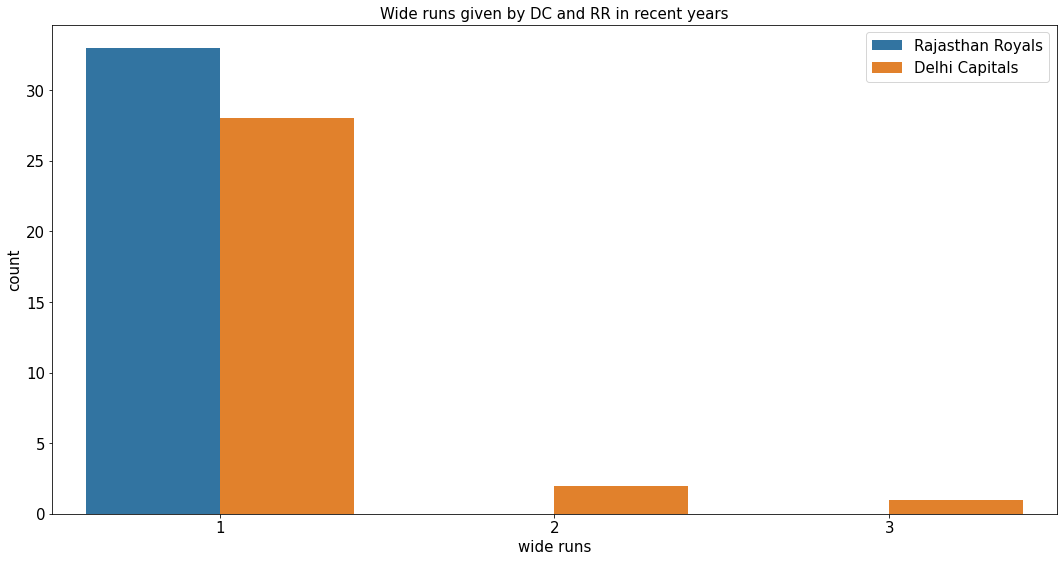

In [36]:
plt.figure(figsize = (18,9))
sns.countplot(wides['wide_runs'],hue=wides['bowling_team'])
plt.title("Wide runs given by DC and RR in recent years",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('wide runs',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc=1,fontsize=15)

From the above analysis we can predict that in today's match more then 6 wides are expected to be delivered.